Lección 23 - Lanzamiento de monedas
===================================

**Author:** Marcos Bujosa



$
\newcommand{\R}[1][{}]{{\mathbb{R}}^{#1}}
\newcommand{\Z}[1][{}]{{\mathbb{Z}}^{#1}}
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\newcommand{\getItem}{\pmb{\mid}}
\newcommand{\getitemR}[1]{\getItem{#1}}
\newcommand{\getitemL}[1]{{#1}\getItem}
\newcommand{\elemR}[2]{{#1}^{\phantom{\T}}_{\getitemR{#2}}} 
\newcommand{\elemRP}[2]{{\big(#1\big)}^{\phantom{\T}}_{\getitemR{#2}}} 
\newcommand{\elemRPE}[2]{\big({#1}^{\phantom{\T}}_{\getitemR{#2}}\big)}
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\newcommand{\Vect}[2][{}]{{\boldsymbol{#2}}_{#1}}
\newcommand{\eleVR}[2]  {\elemR  {\Vect{#1}}{#2}}	 % con subindices
\newcommand{\eleVRP}[2] {\elemRP {\Vect{#1}}{#2}}      % con subindices y paréntesis interior
\newcommand{\eleVRPE}[2]{\elemRPE{\Vect{#1}}{#2}}      % con subindices y paréntesis exterior
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\newcommand{\VectC}[2][{}]  {\elemR  {\Mat{#2}}{#1}}   % con subindices
\newcommand{\VectCP}[2][{}] {\elemRP {\Mat{#2}}{#1}}   % con subindices y paréntesis
\newcommand{\VectCPE}[2][{}]{\elemRPE{\Mat{#2}}{#1}}   % con subindices y paréntesis exterior
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\newcommand{\mat}[1]{\mathbf{#1}}
\newcommand{\Mat} [2][{}]{{\mat{#2}}_{#1}} 
\newcommand{\T}{\intercal}
\newcommand{\MatT}[2][{}]{{\mat{#2}}^{\T}_{#1}}
\newcommand{\VectCC}[2][{}]   {\elemRR {\Mat{#2}}{#1}}   % con ()
\newcommand{\VectCCC}[2][{}]  {\elemRRR{\Mat{#2}}{#1}}   % con texto "col"
%SELECCIÓNA de FILAS y COlUMNAS DE UNA MATRIZ TRANSPUESTA PARA GENERAR UN VECTOR DE Rn
\newcommand{\VectTC}[2][{}]   {\elemR{\MatT{#2}\!}{#1}}  % con subindices
\newcommand{\VectTCC}[2][{}]  {\elemRR{ \MatT{#2}}{#1}}  % con ()
\newcommand{\VectTCCC}[2][{}] {\elemRRR{\MatT{#2}}{#1}}  % con texto "col"
\newcommand{\dotprod}[2][{}] {\Vect{#1}\cdot\Vect{#2}}
$



#### Primer paso para usar [NAcAL](https://github.com/mbujosab/nacallib)



Para poder usar [NAcAL](https://github.com/mbujosab/nacallib) es necesario importar el módulo:



In [1]:
from nacal import *

## Definición de algunas operaciones y objetos



Definamos el productorio *aspa* introducido en la lección anterior del
libro:



In [2]:
def aspa(lista):
    result = [[]]
    for pool in lista:
        result = [x+[y] for x in result for y in pool]
    for prod in result:
        yield tuple(prod)

### Variable aleatoria indicatriz



Vamos a crear un nuevo tipo de vector (que debe ser indicatriz) y que
posee un atributo adicional: la probabilidad asociada al suceso
indicado por dicho vector indicatriz (si el vector en nulo su
probabilidad será cero y si el vector es la constante 1, la
probabilidad será uno).



In [3]:
class VAI(Vector):
    def __init__(self, data, prb = 0, rpr = 'columna'):
        super().__init__(data)
        if not all([int(i==0 or i==1) for i in self]):
            raise ValueError('No es un vector indicatriz')
        if Vector(self).es_nulo(): prb = 0 
        if Vector(self)==V1(Vector(self).n): prb = 1
        self.prb = prb

Así, podemos generar un vector indicatriz e indicar la probabilidad
asociada al correspondiente suceso.



In [4]:
u = VAI([1,1,0,1], fracc(1,2))
print(u.prb)
u

1/2


Si el vector es nulo o es la constante uno, ignora la probabilidad que
indiquemos y asocia la probabilidad cero o uno respectivamente.



In [5]:
VAI(V0(5), fracc(1,2)).prb

0

### Subespacio probabilizable



La clase `SubEspacioProb` es una subclase de la clase `SubEspacio`
cuyo atributo `base` siempre es la *base canónica* y con un atributo
adicional que es un `embrion` del subespacio compuesto por sucesivos
números naturales.



In [6]:
class SubEspacioProb(SubEspacio):
    def __init__(self, data):
        if not isinstance(data, (Sistema, Matrix, Vector)):
            raise ValueError('Argumento debe ser un Sistema, una Matrix o un Vector embrión')
        prodH     = lambda u,w: Vector([u[i]*w[i] for i in range(u.n)])
        productoH = lambda x,n: V1(n) if not x else prodH(x[0], productoH(x[1:], n) )
        def BaseCspanEmbrion(v):
            return Sistema([Vector([int(i==j) for i in v.lista]) for j in set(v.lista)])
        
        if isinstance(data, Vector):
            baseC = BaseCspanEmbrion(data)
        elif isinstance(data, (Sistema, Matrix)):
            n = (data[0]).n
            Q = [x for x in aspa([BaseCspanEmbrion(u) for u in data]) ]
            baseC = Sistema([v for v in [productoH(s,n) for s in Q] if v.no_es_nulo()])
        baseC = ElimG(baseC).sis()
        super().__init__(baseC)
        
        self.embrion = Matrix(baseC)*Vector(list(range(1,len(baseC)+1)))

In [7]:
a=Vector([5,1,2,5]); a

Si empleamos un vector como argumento, usará este como embrión del
subespacio probabilizable.  El atributo `base` es la base canónica del
subespacio.



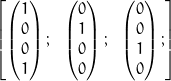

In [8]:
G = SubEspacioProb(a)
G.base

Si empleamos una matriz como argumento, usará sus columnas como
embriones y el resultado será la envolvente probabilizable de los
subespacios creados con cada uno de los embriones (columnas).



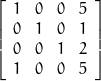

In [9]:
B=Matrix([Vector([1,0,0,1]),Vector([0,1,0,0]),Vector([0,0,1,0]),a]); B

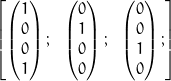

In [10]:
H = SubEspacioProb(B)
H.base

El atributo `embrión` es un embrión del subespacio



In [11]:
H.embrion

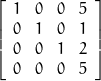

In [12]:
C=(I(4)|(1,2,3)).concatena(Matrix([a])); C

In [13]:
J = SubEspacioProb(C)
J.embrion

### Espacio Euclídeo de probabilidad



La clase `EspacioEuclideoProb` es una subclase de la clase
`SubEspacioProb` que incluye las probabilidades asociadas a los
vectores indicatrices de su base canónica y la función de masa de
probabilidad asociada al embrión.



In [14]:
class EspacioEuclideoProb(SubEspacioProb):
    def __init__(self, data, fmp={}):
        super().__init__(SubEspacioProb(data).base)
        if not fmp:
            fmp = dict(zip(set(self.embrion),[fracc(1,len(set(self.embrion)))]*len(set(a))))
        elif isinstance(fmp, (list, tuple, dict)) and len(fmp)!=len(self.base):
            raise ValueError('La función de masa de probab. debe ser una lista, tupla o dicionario con probabilidades para cada vector de la base canónica')
        elif isinstance(fmp, (list, tuple)):
            fmp = dict(zip(set(self.embrion),fmp))
        self.fmp = fmp
        if sum([p for p in fmp.values()])!=1:
            raise ValueError('Las probabilidades deben sumar 1')
        self.base = Sistema([VAI(v,list((self.fmp).values())[c]) for c,v in enumerate(self.base)])

1/3
{1: 1/3, 2: 1/3, 3: 1/3}


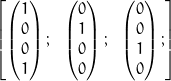

In [15]:
K = EspacioEuclideoProb(a)
print(K.base[0].prb)
print(K.fmp)
K.base

In [16]:
K = EspacioEuclideoProb(a,dict(zip(set(a),[fracc(1,2),fracc(1,4),fracc(1,4)])))
print(K.base[0].prb)
print(K.fmp)
K.base[0].prb

1/2
{1: 1/2, 2: 1/4, 5: 1/4}


1/2

In [17]:
K = EspacioEuclideoProb(a,[fracc(1,2),fracc(3,8),fracc(1,8)])
print(K.base[0].prb)
print(K.fmp)
K.base[1].prb

1/2
{1: 1/2, 2: 3/8, 3: 1/8}


3/8

## Ejemplo de la demostración en el libro sobre la *construcción de subespacios independientes e isomorfos*.



En dicho ejemplo
$\mathcal{R}_1=\mathcal{L}(\Vect[1]{u},\Vect[2]{u})$ y $\mathcal{R}_2=\mathcal{L}(\Vect[1]{w},\Vect[2]{w},\Vect[3]{w})$ 

Para usar variables simbólicas correspondientes a los anteriores
vectores cargamos el siguiente módulo



In [18]:
from sympy import symbols

Generemos la lista con los cinco vectores (aquí los subíndices
comienzan con cero como es costumbre en python).



In [19]:
R1=symbols('u:2')
R2=symbols('w:3')
lista=R1+R2
lista

(u0, u1, w0, w1, w2)

El productorio aspa entre la lista `R1` y `R2` nos da el conjunto de
todos pares posibles $(\Vect[i]{u},\Vect[j]{w})$ con $i=0:1$ y $j=0:2$



In [20]:
B = [x for x in aspa((R1,R2)) ]
B

[(u0, w0), (u0, w1), (u0, w2), (u1, w0), (u1, w1), (u1, w2)]

Enumerando los pares y indicando si cada uno de los vectores está o no
en el par enumerado, construimos los vectores versión *estrella* de la
demo (aquí se ha seguido la numeración consecutiva de todos los pares,
y por eso obtenemos unos vectores estrella diferentes de los del
libro). Así la primera columna es $\Vect[0]{u}^*$, la segunda
$\Vect[1]{u}^*$, la tercera $\Vect[0]{w}^*$, la cuarta
$\Vect[1]{w}^*$ y la quinta $\Vect[2]{w}^*$



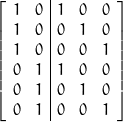

In [21]:
M = Matrix([ [ int(i in w) for i in lista ] for w in B]).ccol({len(R1),len(R1+R2)})
M

Así pues, las dos primeras columnas son la base canónica del
subespacio probabilizable $\mathcal{R}_1^*$ isomorfo a $\mathcal{R}_1$
y las tres últimas columnas son la base canónica del subespacio
probabilizable $\mathcal{R}_2^*$ isomorfo a $\mathcal{R}_2$. 

Obtenemos la envolvente probabilizable de ambos espacios con todos los
productos de Hadamard entre los vectores indicatrices de ambas bases.



In [22]:
prodH     = lambda u,w: Vector([u[i]*w[i] for i in range(u.n)])
productoH = lambda x,n: V1(n) if not x else prodH(x[0], productoH(x[1:], n) )

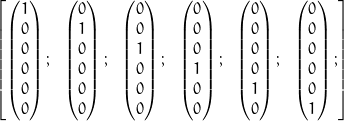

In [23]:
n = M.m
Q = [x for x in aspa([M[:2],M[2:]]) ]
baseC = Sistema([v for v in [productoH(s,n) for s in Q] if v.no_es_nulo()])
baseC

En este caso la base canónica de la envolvente son las columnas de la
matriz identidad de orden 6.



## Lanzamiento de $m$ monedas



Para generar variables simbólicas con doble subíndice usaré el siguiente módulo



In [24]:
from sympy import Symbol

En el lanzamiento de una moneda hay dos `lados` posibles en cada
lanzamiento (cara o cruz). También especificamos el número de
lanzamientos, `rep` (*poner más de 14 lanzamientos empieza a ser
demasiado*)



In [25]:
lados = 2
rep   = 4 # 14

La siguiente función auxiliar genera una tupla con los elementos en
las tuplas de una lista de tuplas



In [26]:
listaElementos = lambda x: () if not x else x[0] + listaElementos(x[1:])

Generamos una lista `A` de pares. El primer par corresponde al primer
lanzamiento, el segundo par al segundo, etc. En cada par, la primera
variable corresponde al resultado cara y la segunda al resultado
cruz. Por tanto el primer subíndice de cada variable simbólica indica
el número de lanzamiento, el segundo subíndice indica cara (0) o cruz
(1).



In [27]:
A = [tuple(Symbol(f'u_{i}{j}' ) for j in range(lados)) for i in range(rep) ]
A

[(u_00, u_01), (u_10, u_11), (u_20, u_21), (u_30, u_31)]

### Repetición de los pasos del ejemplo de la demostración correspondiente a la sección anterior



`B` es una lista con el conjunto de las *n*-tuplas (donde *n* es el
número de lanzamientos) con todos los resultados posibles.

<u>¡Ojo! Esta lista crece mucho con el número de lanzamientos `rep`; es
mejor no pedir que se muestre el resultado en pantalla</u> (salvo cuando
`rep` es un número reducido, por ejemplo, 3 o menos)



In [28]:
B = [x for x in aspa(A) ]
if rep<=4: print(B)

[(u_00, u_10, u_20, u_30), (u_00, u_10, u_20, u_31), (u_00, u_10, u_21, u_30), (u_00, u_10, u_21, u_31), (u_00, u_11, u_20, u_30), (u_00, u_11, u_20, u_31), (u_00, u_11, u_21, u_30), (u_00, u_11, u_21, u_31), (u_01, u_10, u_20, u_30), (u_01, u_10, u_20, u_31), (u_01, u_10, u_21, u_30), (u_01, u_10, u_21, u_31), (u_01, u_11, u_20, u_30), (u_01, u_11, u_20, u_31), (u_01, u_11, u_21, u_30), (u_01, u_11, u_21, u_31)]


#### Construcción del subespacio probabilizable envolvente $\mathcal{E}$



<u>¡De nuevo esta matriz crece mucho con el número de lanzamientos
`rep`! Es mejor no pedir que se muestre el resultado en pantalla</u> si
`rep` es mayor que 4.

Las columnas de las submatrices de $\mathcal{E}$ son las bases
canónicas de cada una de las réplicas $\mathcal{R^*_j}$ del espacio
probabilizable $\mathcal{R}$ original correspondiente al lanzamiento
de una moneda.



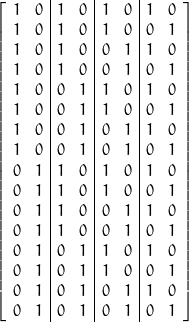

In [29]:
E = Matrix([ [ int(i in w) for i in listaElementos(A) ] for w in B]).ccol({2,4,6})
if rep<=4: display(E)

El número de filas de esta matriz corresponde al número de posibles
resultados al lanzar `rep` veces una moneda:



In [30]:
print('Number of possible outcomes: ', E.m)

Number of possible outcomes:  16


#### Construcción del espacio muestral para el lanzamiento de *m* monedas.



Para construir el espacio muestral para el lanzamiento de *m* monedas,
en lugar de las bases canónicas estrella, necesitamos *m* embriones
(variables aleatorias) correspondientes a los espacios probabilizables
$\mathcal{R^*_j}$

Las columnas de la siguiente matriz son embriones de cada una de las
réplicas $\mathcal{R^*_j}$ del espacio probabilizable $\mathcal{R}$
original correspondiente al lanzamiento de una moneda.



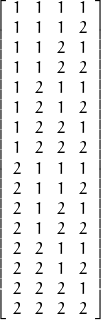

In [31]:
SampleSp = Matrix([SubEspacioProb(Matrix(E[i*lados:(i+1)*lados])).embrion for i in range(rep)])
if rep<=4  and lados<=3: display(SampleSp)

El conjunto de las filas de la matriz anterior es el espacio
muestral. En cada fila, un `1` corresponde al caso "*la moneda muestra
cara*" (H) y un `2` corresponde al caso "*la moneda muestra cruz*"
(T). Por tanto, las filas de la matriz anterior muestran todos los
resultados posibles al lanzar una moneda `rep` veces, donde `rep` es
el número de columnas, es decir de variables aleatorias (donde cada
una de ellas corresponde a un lanzamiento).



#### Experimento



Así, "*realizar*" el experimento consiste en evaluar las variables
aleatorias de la matriz anterior (las columnas) en un mismo elemento
$n$ de su dominio $\Omega$ (se suele denominar a dicho elemento
*suceso elemental*); es decir, consiste en mirar la componente
$n$-ésima de los `rep` embriones, o lo que es lo mismo, en elegir
"una" fila de la matriz.

El azar consiste en que no sabemos en que punto del dominio se
evaluarán las variables aleatorias. Para simular dicha circunstancia
usaremos el modulo `random` para escoger una fila al azar.



In [32]:
import random

In [33]:
trial   = random.choice(range(SampleSp.m))
outcome = trial|SampleSp
print(trial)
outcome

0


In [34]:
print('number of heads: ', sum([int(e==1) for e in outcome]) )

number of heads:  0


In [35]:
print('number of tails: ', sum([int(e==2) for e in trial|SampleSp]) )

number of tails:  4


##### Frecuencia de los posibles resultados



Podemos contar el número de caras en cada uno de los posibles
resultados



In [36]:
res = [sum([int(e==1) for e in r]) for r in (~SampleSp).lista]
res

[4, 3, 3, 2, 3, 2, 2, 1, 3, 2, 2, 1, 2, 1, 1, 0]

Podemos mirar la frecuencia contando el número de veces que aparece
cada lado en cada caso.



In [37]:
def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

In [38]:
count_elements(res)

{4: 1, 3: 4, 2: 6, 1: 4, 0: 1}

O con un histograma



(0.0, 10.0)

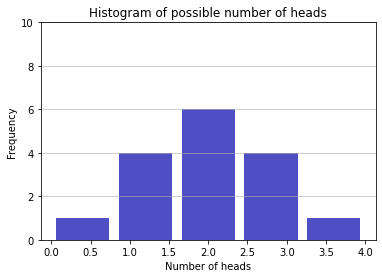

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=res, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of heads')
plt.ylabel('Frequency')
plt.title('Histogram of possible number of heads')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Este histograma de frecuencias nada tiene que ver con la probabilidad
de cada resultado (salvo si la moneda es justa y dividimos cada
frecuencia absoluta del histograma por el número de casos).

Para reflejar la probabilidad es necesario emplear el espacio euclídeo
de probabilidad, es decir, al espacio probabilizable hay que definir
una función esperanza. Lo podemos hacer incorporando una función de
masa de probabilidad, para los distintos valores de la variable
aleatoria embrión, o alternativamente asignando una probabilidad a
cada vector de la base canónica. 

Por cuestiones didácticas implementaremos ambas vías.



## Lanzamiento de $m$ dados con $k$ lados



Indicamos el numero de `lados` y el número de lanzamientos, `rep`
(*ambos números deben ser pequeños o tendremos problemas con la
memoria del ordenador*)



In [40]:
lados = 3
rep   = 4 # ó 5 (con 3 lados y 6 repeticiones ya tarda mucho)

Generamos una lista `A` de $k$-tuplas. La primera corresponde al
primer lanzamiento, la segunda par al segundo, etc. En cada $k$-tupla,
la primera variable corresponde al resultado primera cara y la segunda
al resultado segunda cara, etc. Por tanto el primer subíndice de cada
variable simbólica indica el número de lanzamiento, el segundo
subíndice indica el lado mostrado por el dado.



In [41]:
A = [tuple(Symbol(f'u_{i}{j}' ) for j in range(lados)) for i in range(rep) ]
A

[(u_00, u_01, u_02),
 (u_10, u_11, u_12),
 (u_20, u_21, u_22),
 (u_30, u_31, u_32)]

### Repetición de los pasos del ejemplo de la demostración correspondiente a la sección anterior



`B` es una lista con el conjunto de las *n*-tuplas (donde *n* es el
número de lanzamientos) con todos los resultados posibles.

<u>¡Ojo! Esta lista crece mucho con el número de lanzamientos `rep`; es
mejor no pedir que se muestre el resultado en pantalla</u> (salvo cuando
`rep` es un número reducido, por ejemplo, 3 o menos)



In [42]:
B = [x for x in aspa(A) ]
if rep<=4 and lados<=3: print(B)

[(u_00, u_10, u_20, u_30), (u_00, u_10, u_20, u_31), (u_00, u_10, u_20, u_32), (u_00, u_10, u_21, u_30), (u_00, u_10, u_21, u_31), (u_00, u_10, u_21, u_32), (u_00, u_10, u_22, u_30), (u_00, u_10, u_22, u_31), (u_00, u_10, u_22, u_32), (u_00, u_11, u_20, u_30), (u_00, u_11, u_20, u_31), (u_00, u_11, u_20, u_32), (u_00, u_11, u_21, u_30), (u_00, u_11, u_21, u_31), (u_00, u_11, u_21, u_32), (u_00, u_11, u_22, u_30), (u_00, u_11, u_22, u_31), (u_00, u_11, u_22, u_32), (u_00, u_12, u_20, u_30), (u_00, u_12, u_20, u_31), (u_00, u_12, u_20, u_32), (u_00, u_12, u_21, u_30), (u_00, u_12, u_21, u_31), (u_00, u_12, u_21, u_32), (u_00, u_12, u_22, u_30), (u_00, u_12, u_22, u_31), (u_00, u_12, u_22, u_32), (u_01, u_10, u_20, u_30), (u_01, u_10, u_20, u_31), (u_01, u_10, u_20, u_32), (u_01, u_10, u_21, u_30), (u_01, u_10, u_21, u_31), (u_01, u_10, u_21, u_32), (u_01, u_10, u_22, u_30), (u_01, u_10, u_22, u_31), (u_01, u_10, u_22, u_32), (u_01, u_11, u_20, u_30), (u_01, u_11, u_20, u_31), (u_01, u_11

#### Construcción del subespacio probabilizable envolvente $\mathcal{E}$



\_¡De nuevo esta matriz crece mucho con el número de lanzamientos `rep`
y el número de lados (`lados`)! Es mejor no pedir que se muestre el
resultado en pantalla\_ si `rep` es mayor que 4.

Las columnas de las submatrices de $\mathcal{E}$ son las bases
canónicas de cada una de las réplicas $\mathcal{R^*_j}$ del espacio
probabilizable $\mathcal{R}$ original correspondiente al lanzamiento
de una moneda.



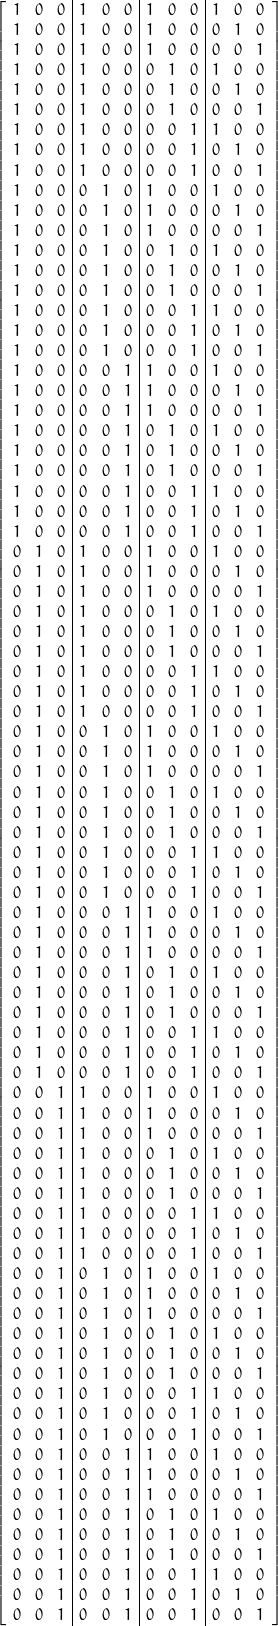

In [43]:
E = Matrix([ [ int(i in w) for i in listaElementos(A) ] for w in B]).ccol({3,6,9},)
if rep<=4  and lados<=3: display(E)

El número de filas de esta matriz corresponde al número de posibles
resultados al lanzar `rep` veces una moneda:



In [44]:
print('Number of possible outcomes: ', E.m)

Number of possible outcomes:  81


#### Construcción del espacio muestral para el lanzamiento de *m* monedas.



Para construir el espacio muestral para el lanzamiento de *m* monedas,
en lugar de las bases canónicas estrella, necesitamos *m* embriones
(variables aleatorias) correspondientes a los espacios probabilizables
$\mathcal{R^*_j}$

Las columnas de la siguiente matriz son embriones de cada una de las
réplicas $\mathcal{R^*_j}$ del espacio probabilizable $\mathcal{R}$
original correspondiente al lanzamiento de una moneda.



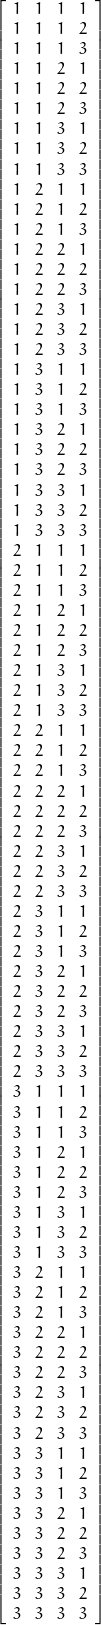

In [45]:
SampleSp = Matrix([SubEspacioProb(Matrix(E[i*lados:(i+1)*lados])).embrion for i in range(rep)])
if rep<=4  and lados<=3: display(SampleSp)

El conjunto de las filas de la matriz anterior es el espacio
muestral. En cada fila, un `1` corresponde al caso "*la moneda muestra
cara*" (H) y un `2` corresponde al caso "*la moneda muestra cruz*"
(T). Por tanto, las filas de la matriz anterior muestran todos los
resultados posibles al lanzar una moneda `rep` veces, donde `rep` es
el número de columnas, es decir de variables aleatorias (donde cada
una de ellas corresponde a un lanzamiento).



#### Experimento



Así, "*realizar*" el experimento consiste en evaluar las variables
aleatorias de la matriz anterior (las columnas) en un mismo elemento
$n$ de su dominio $\Omega$ (se suele denominar a dicho elemento
*suceso elemental*); es decir, consiste en mirar la componente
$n$-ésima de los `rep` embriones, o lo que es lo mismo, en elegir
"una" fila de la matriz.

El azar consiste en que no sabemos en que punto del dominio se
evaluarán las variables aleatorias. Para simular dicha circunstancia
usaremos el modulo `random` para escoger una fila al azar.



In [46]:
import random

In [47]:
trial   = random.choice(range(SampleSp.m))
outcome = trial|SampleSp
print(trial)
outcome

51


In [48]:
print('number of heads: ', sum([int(e==1) for e in outcome]) )

number of heads:  0


In [49]:
print('number of tails: ', sum([int(e==2) for e in trial|SampleSp]) )

number of tails:  2


In [50]:
print('number of tails: ', sum([int(e==3) for e in trial|SampleSp]) )

number of tails:  2


##### Frecuencia de los posibles resultados



Podemos contar el número de veces que se nuestra la primera cara en
cada uno de los posibles resultados



In [51]:
res = [sum([int(e==1) for e in r]) for r in (~SampleSp).lista]

Podemos mirar la frecuencia contando el número de veces que aparece
cada lado en cada caso.



In [52]:
def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

In [53]:
count_elements(res)

{4: 1, 3: 8, 2: 24, 1: 32, 0: 16}

O con un histograma



(0.0, 40.0)

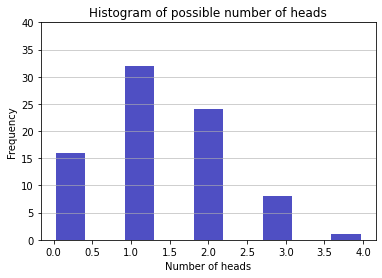

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=res, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of heads')
plt.ylabel('Frequency')
plt.title('Histogram of possible number of heads')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Este histograma de frecuencias nada tiene que ver con la probabilidad
de cada resultado (salvo si la moneda es justa y dividimos cada
frecuencia absoluta del histograma por el número de casos).

Para reflejar la probabilidad es necesario emplear el espacio euclídeo
de probabilidad, es decir, al espacio probabilizable hay que definir
una función esperanza. Lo podemos hacer incorporando una función de
masa de probabilidad, para los distintos valores de la variable
aleatoria embrión, o alternativamente asignando una probabilidad a
cada vector de la base canónica. 

Por cuestiones didácticas implementaremos ambas vías.



## Espacio euclideo de probabilidad



### Ejemplo de la demostración en el libro sobre la *construcción de subespacios independientes e isomorfos*.



In [55]:
R1=symbols('u:2')
R2=symbols('w:3')
lista=R1+R2
lista

(u0, u1, w0, w1, w2)

In [56]:
B = [x for x in aspa((R1,R2)) ]
B

[(u0, w0), (u0, w1), (u0, w2), (u1, w0), (u1, w1), (u1, w2)]

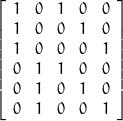

In [57]:
M = Matrix([ [ int(i in w) for i in lista ] for w in B]).ccol({len(R1),len(R1+R2)})
fmp = [fracc(3,4),fracc(1,4),fracc(1,2),fracc(1,4),fracc(1,4)]
M = Matrix([VAI(M[i],fmp[i]) for i in range(M.n)])
M

In [58]:
prodH     = lambda u,w: VAI([u[i]*w[i] for i in range(u.n)],u.prb*w.prb)
productoH = lambda x,n: VAI(V1(n),1) if not x else prodH(x[0], productoH(x[1:], n) )

In [59]:
n = M.m
Q = [x for x in aspa([M[:2],M[2:]]) ]
baseC = Sistema([v for v in [productoH(s,n) for s in Q] if v.no_es_nulo()])
print([(baseC[i]).prb for i in range(len(baseC))])
sum([(baseC[i]).prb for i in range(len(baseC))])

[3/8, 3/16, 3/16, 1/8, 1/16, 1/16]


1

In [60]:
class SampleSpace(Matrix):
    def __init__(self, data, Prb=0):
        super().__init__(data)
        self.lista = [ VA(i,Prb) for i in self.lista ]